# Tercer desafío

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Predicción de enfermedades genéticas

En el siguiente dataset, se tiene información de pacientes pediatricos con diferentes enfermedades genéticas. Una efermedad genética es comúnmente causada por anomalías o mutaciones del ADN, es bien sabido que muchas de estas enfermedades son hereditarias o se dan debido a exposiciones a radiación, consumo de sustancias o una exposición ambiental fuerte. Debido a los elevados costos que conlleva realizar test de dichas enfermedades se quiere plantear la posibilidad de realizar un modelo predictivo haciendo uso de Machine Learning. Las variables de este dataset son en su mayoría categóricas, el dataset incluye datos demográficos del paciente, la información de antecedentes genéticas en sus padres, signos vitales, información relevante durante el embarazo y la enfermedad genética que se le ha diagnosticado. 

In [3]:
path = 'C:/Users/USA/Downloads/archive (2)/'
file_name = 'train_genetic_disorders'

#Leo el archivo con pandas
df3 = pd.read_csv(path + file_name + '.csv')
df3=df3.dropna(how="all")
fil3,col3=df3.shape
fil3,col3

(21011, 45)

In [4]:
#Encabezado de mis datos
pd.set_option('display.max_columns', None)
df3.head(45)


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,0.0,0.0,0.0,1.0,0.0,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,NaN,63.0,Not applicable,-,Alive,Normal (30-60),NaN,NaN,0.0,0.0,1.0,0.0,NaN,Low,Male,No record,Not applicable,Home,NaN,Yes,No,Not applicable,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,40.0,NaN,Not applicable,-,Alive,Tachypnea,Normal,0.0,0.0,NaN,1.0,0.0,Yes,Low,NaN,No record,Not applicable,Home,Yes,Yes,No,-,No,Yes,1.0,Singular,9.836351,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,45.0,44.0,Lemuel Shattuck Hospital,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,44.0,42.0,Shriners Burns Institute,"1200 Centre St\nRoslindale, MA 021

Text(0.5, 1.0, 'Géneros de los pacientes')

<Figure size 432x288 with 0 Axes>

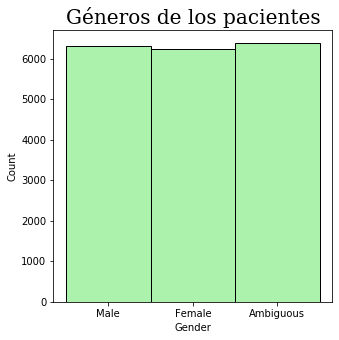

In [37]:
#Quiero conocer un poco más a los pacientes 
plt.figure()
plt.subplots(1,1,figsize=(5,5))
sns.histplot(data=df3,x="Gender", binwidth=3,color="lightgreen")
plt.title("Géneros de los pacientes",fontdict={'family': 'serif', 
                    'size': 20},loc='center')

([<matplotlib.patches.Wedge at 0x204173e8308>,
 [Text(0.14667157748406365, 1.191002707116292, 'Mitochondrial genetic inheritance disorders'),
  Text(-1.097933662790685, -0.06739192912382465, 'NA'),
  Text(-0.8659661769957742, -0.6783086172969675, 'Multifactorial genetic inheritance disorders'),
  Text(0.508577851888236, -0.975370990223078, 'Single-gene inheritance diseases')],
 [Text(0.08555842019903713, 0.6947515791511704, '46.1%'),
  Text(-0.5988729069767372, -0.03675923406754071, '9.8%'),
  Text(-0.4723451874522404, -0.36998651852561854, '9.4%'),
  Text(0.27740610102994684, -0.5320205401216789, '34.7%')])

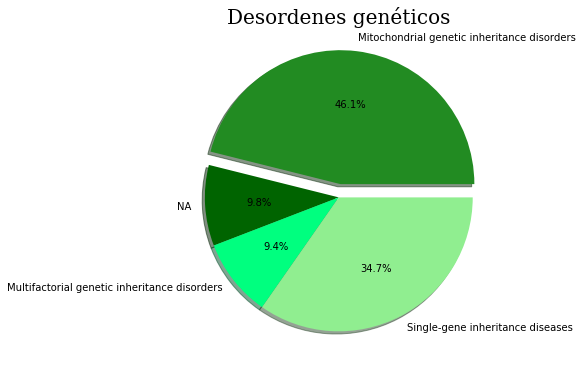

In [38]:
df3["Genetic Disorder"].fillna("NA",inplace=True)
#De mis datos, tomé la columna con los desordenes genéticos y cambié los valores nulos por NA= No Answer


issue=df3["Genetic Disorder"].unique()
#issue es una lista con valores no repetidos 
issue[1]="NA"



dataBySamp=[df3[df3["Genetic Disorder"]==x] for x in issue]
#Lo que hice en la línea anterior fue crear una lista llamada dataBySamp que contiene de forma organizada 
#...los pacientes con las 4 diferentes issues 
numero_pacientes=[] 
#con el siguiente for lo que hago es contar cuántos pacientes tienen x issue y ese valor guardarlo en la 
#...lista numero_pacientes
for i in range(len(dataBySamp)):
    numero_pacientes.append(len((dataBySamp[i]["Genetic Disorder"])))
explode = (0.1, 0, 0, 0)
plt.figure(figsize=(6,8))
plt.title("Desordenes genéticos", 
          fontdict={'family': 'serif', 
                    'size': 20},
          loc='center')


plt.pie(numero_pacientes,labels=issue, autopct='%1.1f%%',explode=explode,shadow=True,colors=["forestgreen","darkgreen","springgreen","lightgreen"])



([<matplotlib.patches.Wedge at 0x20417451208>,
 [Text(1.0954726063590219, 0.0996983887380928, "Leber's hereditary optic neuropathy"),
  Text(0.8611780303009579, 0.6843773813671538, 'Cystic fibrosis'),
  Text(0.16296672433464746, 1.0878611339503013, 'Diabetes'),
  Text(-0.896389219226665, 0.7978009574162028, 'Leigh syndrome'),
  Text(-1.2997872457458255, -0.023518413987362315, 'Cancer'),
  Text(-0.9979921623990812, -0.4626139252011401, 'Tay-Sachs'),
  Text(-0.5669561962669665, -0.9426349619627383, 'Hemochromatosis'),
  Text(0.30381057132558215, -1.0572129098487322, 'Mitochondrial myopathy'),
  Text(1.0319955119347939, -0.3807693046274121, 'NA'),
  Text(1.0997306754440945, -0.024340120937987764, "Alzheimer's")],
 [Text(0.5975305125594664, 0.05438093931168697, '2.9%'),
  Text(0.4697334710732497, 0.37329675347299296, '15.6%'),
  Text(0.08889094054617133, 0.5933788003365279, '8.3%'),
  Text(-0.5228937112155546, 0.4653838918261183, '23.3%'),
  Text(-0.7998690743051234, -0.014472870146069117,

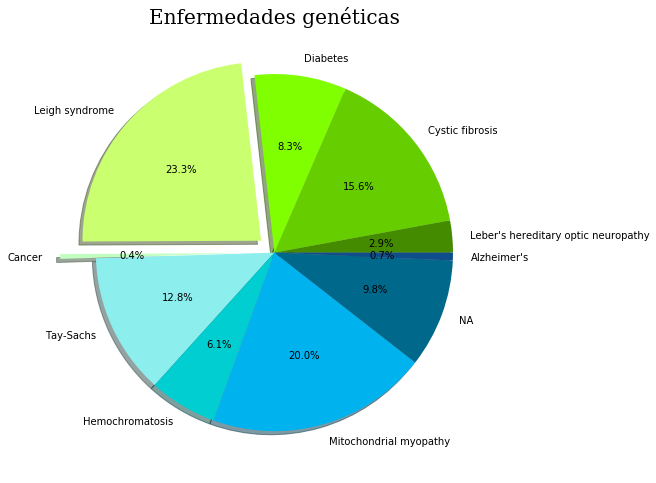

In [39]:
#El siguiente gráfico está basado en la misma lógica del gráfico anterior.
df3["Disorder Subclass"].fillna("NA",inplace=True)

enf=df3["Disorder Subclass"].unique()




dataBySamp=[df3[df3["Disorder Subclass"]==x] for x in enf]
numero_pacientes=[]

for i in range(len(dataBySamp)):
    numero_pacientes.append(len((dataBySamp[i]["Disorder Subclass"])))

explode = (0, 0, 0, 0.1,0.2,0,0,0,0,0) #Me separa una rebanada del pastel
colors=["#458B00","#66CD00","#7FFF00","#CAFF70","#C1FFC1","#8DEEEE","#00CED1","#00B2EE","#00688B","#104E8B"]
plt.figure(figsize=(8,10))
plt.title("Enfermedades genéticas", 
          fontdict={'family': 'serif', 
                    'size': 20},
          loc='center')


plt.pie(numero_pacientes,labels=enf, autopct='%1.1f%%',explode=explode,shadow=True,colors=colors)



Con los anteriores dos pie charts se puede evidenciar que el mayor número de los pacientes padece un transtorno mitocondrial hereditario (43.9%) le sigue pacientes con transtorno hereditario de un solo gen (33%) y transtorno genético multifactorial hereditario (9%). No obstante cabe resaltar que el número de los datos nulos es bastante significativo.

Respecto a las enfermedades, se observa que el mayor número de pacientes padece síndrome de Leigh (22.2%) y la menor es cáncer (0.4%), sin embargo, parece ser que al tomar los datos faltó mencionar qué tipo de cáncer pues se conoce que los tipos de cáncer están asociados potencialmente a transtornos genéticos. Por otro lado, es relevante mencionar la gran cantidad de datos nulos o que probablemente el 14.2% de datos faltantes sean debido a que no se conoce o diagnosticó la enfermedad del paciente.  

In [15]:
a=df3.groupby("Disorder Subclass")
a.mean()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Disorder Subclass,,,,,,,,,,,,,,,,
Alzheimer's,6.541667,4.901682,35.103774,43.383178,0.0,0.0,0.0,1.0,0.0,2.115942,7.410902,0.870504,0.932836,0.964286,0.992593,0.978261
Cancer,7.344828,4.871431,34.763889,40.476923,0.0,0.0,0.0,1.0,0.0,2.012048,7.710858,0.204545,0.096386,0.089744,0.023810,0.012195
Cystic fibrosis,6.937337,4.899041,34.666940,41.939877,0.0,0.0,0.0,1.0,0.0,2.008375,7.509479,0.713758,0.702621,0.719595,0.718044,0.716829
Diabetes,6.867366,4.895089,34.593583,42.407181,0.0,0.0,0.0,1.0,0.0,2.012571,7.455242,0.770847,0.773215,0.817614,0.796855,0.842374
Hemochromatosis,6.854184,4.891687,34.490011,42.016310,0.0,0.0,0.0,1.0,0.0,1.951092,7.482562,0.391597,0.305579,0.242735,0.166102,0.108980
Leber's hereditary optic neuropathy,6.798246,4.897884,35.104784,42.008715,0.0,0.0,0.0,1.0,0.0,1.958182,7.495460,0.853748,0.860000,0.880282,0.920863,0.935780
Leigh syndrome,6.952402,4.904211,34.471063,41.610429,0.0,0.0,0.0,1.0,0.0,2.014617,7.446263,0.586495,0.559276,0.544065,0.489381,0.449160
Mitochondrial myopathy,6.961295,4.896271,34.455782,41.971301,0.0,0.0,0.0,1.0,0.0,2.021432,7.490973,0.536934,0.472274,0.426663,0.395046,0.320399
Tay-Sachs,7.064925,4.901260,34.473502,42.038133,0.0,0.0,0.0,1.0,0.0,1.945402,7.498161,0.464823,0.378079,0.355691,0.273287,0.196761


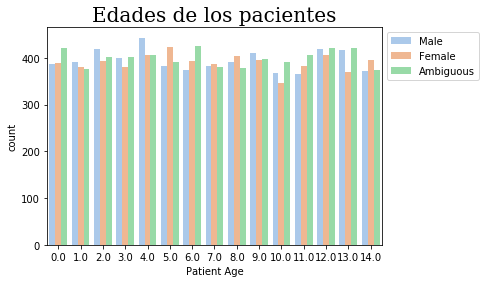

In [40]:
a=df3["Patient Age"].unique()
plt.figure()
plt.title("Edades de los pacientes",fontdict={'family': 'serif','size': 20},loc='center')
sns.countplot(data=df3, x="Patient Age", hue="Gender",palette="pastel")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

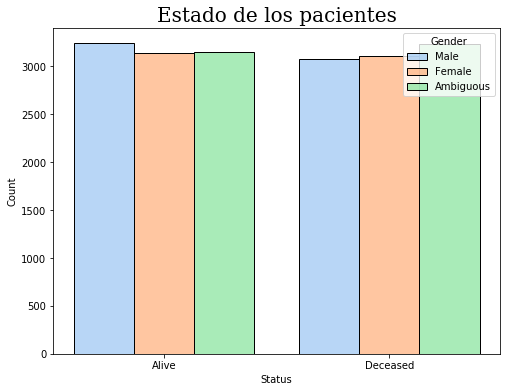

In [196]:
plt.figure(figsize=(8,6))
plt.title("Estado de los pacientes",fontdict={'family': 'serif','size': 20},loc='center')
sns.histplot(data=df3, x="Status", hue="Gender",palette="pastel",multiple="dodge",shrink=.8)


Si se tienen en cuenta las distribuciones de ambas variables, parece ser que el conteo de células rojas (blood cell) es normal, sin embargo, el conteo de células blancas tiene dos extremos marcados de lo cual se puede inferir que una cantidad grande de pacientes posee niveles muy altos o muy bajos, esto tiene sentido pues el conteo de células blancas en sangre nos da información sobre cómo lucha el sistema inmune ante una enfermedad. 

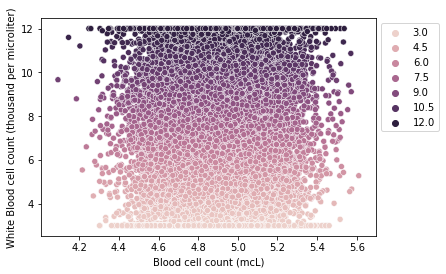

In [179]:
x=df3["White Blood cell count (thousand per microliter)"]
y=df3["Blood cell count (mcL)"]

ax=sns.scatterplot(data=df3,y=x,x=y, hue="White Blood cell count (thousand per microliter)")
ax.legend(bbox_to_anchor=(1, 1))
#Con este scatter realmente no es posible observar algo parecido a una tendencia lineal

(2.8, 12)

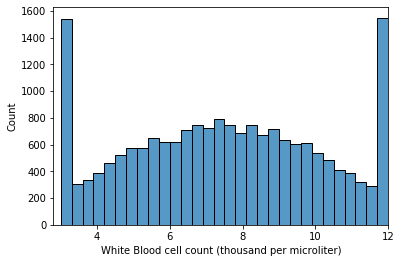

In [27]:
x=df3["White Blood cell count (thousand per microliter)"]
y=df3["Blood cell count (mcL)"]

sns.histplot(x)
plt.xlim(2.8,12)
#Las dos colas extremas de los datos concuerda con lo esperado para enfermades. 


De acuerdo con la clínica de Cleveland (ver https://my.clevelandclinic.org/health/body/21871-white-blood-cells)
estas son las posibles causas de un conteo bajo o alto de células blancas
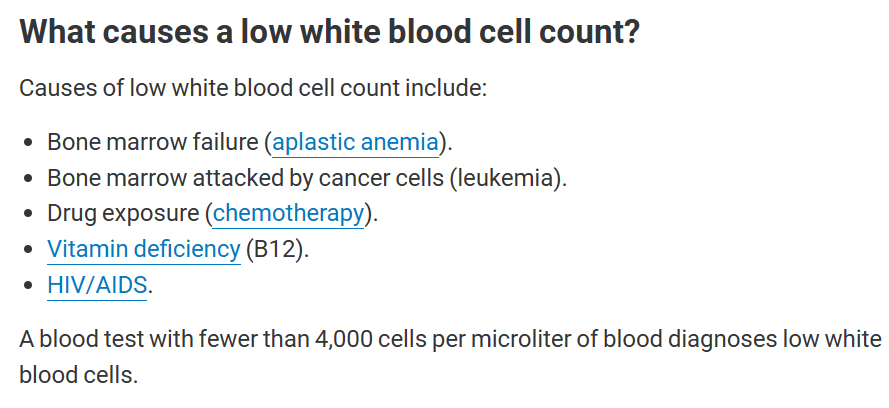

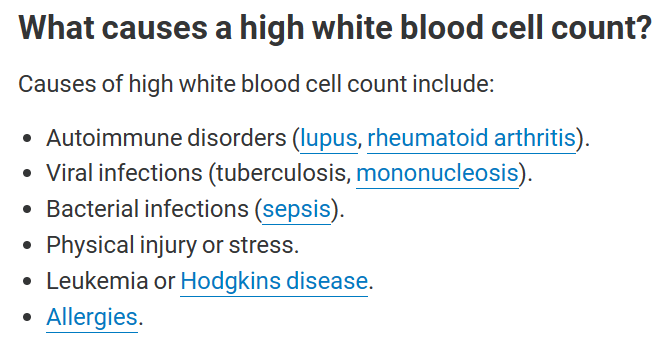

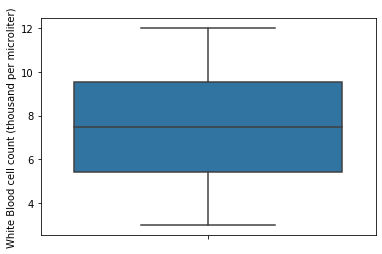

In [12]:
sns.boxplot(data=df3, y=x)

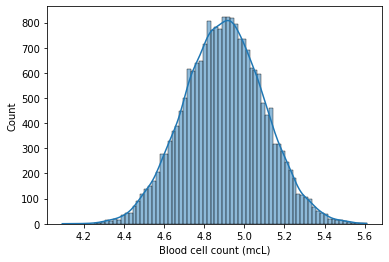

In [14]:
sns.histplot(y,kde=True)

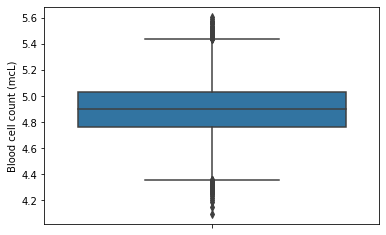

In [13]:
sns.boxplot(data=df3, y=y)

In [26]:
#Quisiera ver si hay alguna correlación entre estas dos variables 
from sklearn.impute import SimpleImputer
#Debido a los valores nulos
imput = SimpleImputer(missing_values=np.nan, strategy="mean")
df3["White Blood cell count imp"] = imput.fit_transform(df3[["White Blood cell count (thousand per microliter)"]])
x=df3["White Blood cell count imp"]
df3["Blood cell count imp"] = imput.fit_transform(df3[["Blood cell count (mcL)"]])
y=df3["Blood cell count imp"]
np.corrcoef(x, y)
#Viendo la matriz, se descarta una correlación


array([[1.        , 0.00101037],
       [0.00101037, 1.        ]])

Text(0, 0.5, ' ')

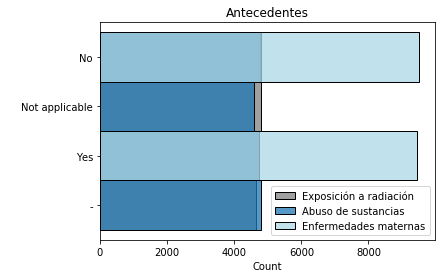

In [131]:

sns.histplot(data=df3, y="H/O radiation exposure (x-ray)",color="gray",label="Exposición a radiación")
sns.histplot(data=df3, y="H/O substance abuse",label="Abuso de sustancias")
sns.histplot(data=df3, y="H/O serious maternal illness",color="lightblue",label="Enfermedades maternas")
plt.legend()
plt.title("Antecedentes")
plt.ylabel(" ")

Text(0, 0.5, ' ')

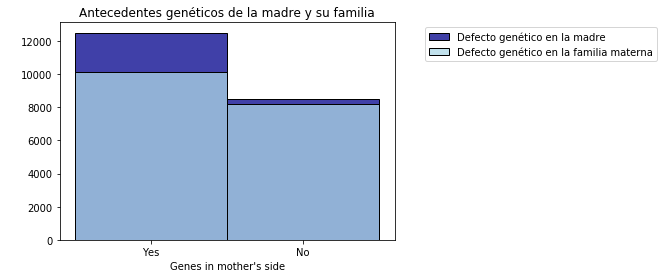

In [321]:



sns.histplot(data=df3, x="Genes in mother's side",color="darkblue",label="Defecto genético en la madre")
sns.histplot(data=df3, x="Maternal gene",color="lightblue",label="Defecto genético en la familia materna")

plt.legend()
plt.legend(bbox_to_anchor=(1.8,1), loc="upper right")


plt.title("Antecedentes genéticos de la madre y su familia")
plt.xlabel(" ")

Text(0.5, 0, ' ')

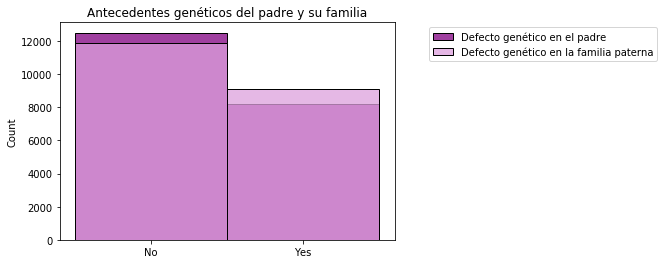

In [325]:
sns.histplot(data=df3, x="Inherited from father",color="purple",label="Defecto genético en el padre")
sns.histplot(data=df3, x="Paternal gene",color="plum",label="Defecto genético en la familia paterna")
plt.legend()
plt.legend(bbox_to_anchor=(1.8,1), loc="upper right")


plt.title("Antecedentes genéticos del padre y su familia")
plt.xlabel(" ")

Text(0.5, 1.0, 'Síntomas vitales')

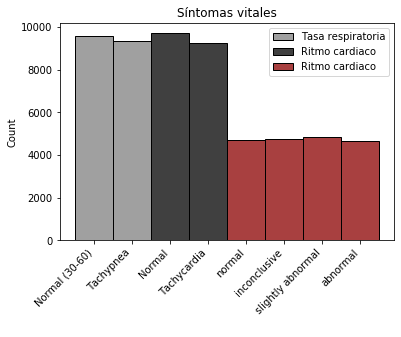

In [198]:
sns.histplot(data=df3, x="Respiratory Rate (breaths/min)",color="gray",label="Tasa respiratoria")
sns.histplot(data=df3, x="Heart Rate (rates/min",color="black",label="Ritmo cardiaco")
sns.histplot(data=df3, x="Blood test result",color="darkred",label="Ritmo cardiaco")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.xlabel(" ")
plt.title("Síntomas vitales")

Text(0.5, 1.0, 'Antecedentes del embarazo')

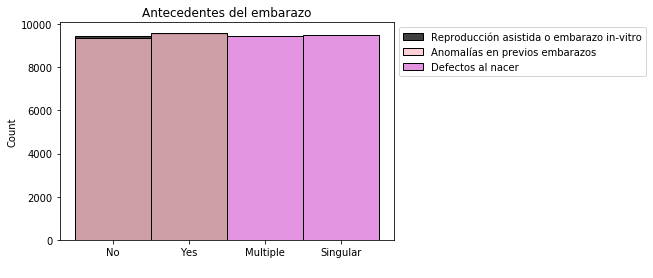

In [233]:
sns.histplot(data=df3, x="Assisted conception IVF/ART",label="Reproducción asistida o embarazo in-vitro",color="black")
sns.histplot(data=df3, x="History of anomalies in previous pregnancies",color="pink",label="Anomalías en previos embarazos")
ax=sns.histplot(data=df3, x="Birth defects",color="orchid",label="Defectos al nacer")


ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel(" ")
plt.title("Antecedentes del embarazo")


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

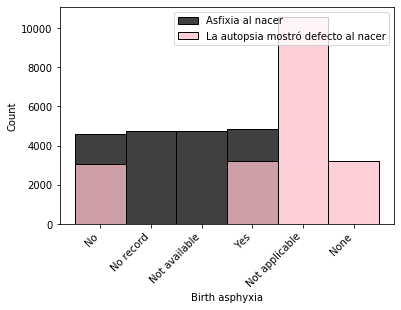

In [263]:
sns.histplot(data=df3, x="Birth asphyxia",label="Asfixia al nacer",color="black")
ax=sns.histplot(data=df3, x="Autopsy shows birth defect (if applicable)",color="pink",label="La autopsia mostró defecto al nacer")
ax.legend(bbox_to_anchor=(2.5, 2.5))
plt.legend()
plt.xticks(rotation=45, ha='right')


([<matplotlib.axis.XTick at 0x20420b4d5c8>,
 <a list of 4 Text xticklabel objects>)

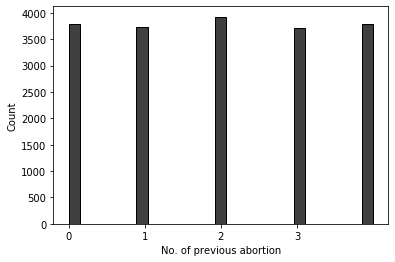

In [161]:
sns.histplot(data=df3, x=df3["No. of previous abortion"],color="black",label="Ritmo cardiaco")
listOf_xticks = np.arange(0, 4, 1)
plt.xticks(listOf_Yticks)